In [55]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [44]:
theta_list=np.arange(-np.pi, np.pi,0.1)
omega_list=np.arange(0, 5,0.1)

rewards = np.ones((len(theta_list),len(omega_list)))

In [61]:
@dataclass
class Data:
    th = None
    omega = None
    u = None

In [68]:
reward_fun=lambda self: -((self.th-np.pi)%(2*np.pi)**2 + 0.1 * self.omega**2 + 0.001 * self.u**2)

for i in range(rewards.shape[0]):
    for j in range(rewards.shape[1]):
        data=Data()
        data.th, data.omega=theta_list[i], omega_list[j]
        data.u=1
        rewards[i,j] = reward_fun(data)

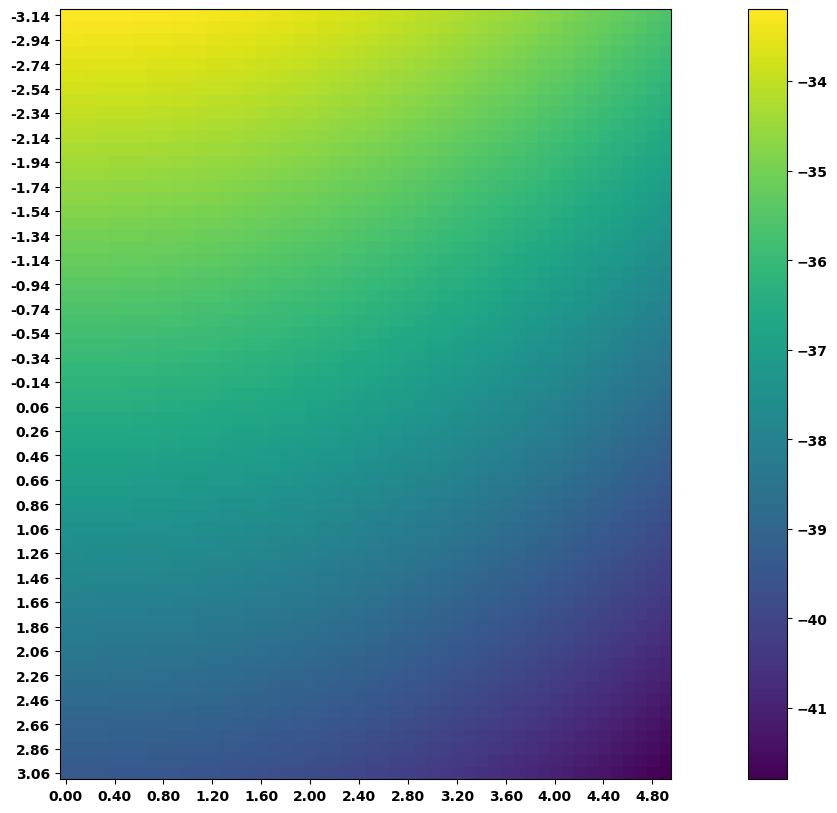

In [69]:
format_values = lambda lst: [f'{x:.2f}' for x in lst]
plt.figure(figsize=(20,10))
y_inc=2
x_inc=4
_ = plt.imshow(rewards)
_ = plt.xticks([*range(len(omega_list))][::x_inc],format_values(omega_list)[::x_inc])
_ = plt.yticks([*range(len(theta_list))][::y_inc],format_values(theta_list)[::y_inc])
_ = plt.colorbar()